In [21]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 6

## Table Review: Welcome Survey

In [22]:
# Here is a table that contains the answers to a survey

welcome = Table.read_table('welcome_survey_v1.csv')
welcome.labels

('Extraversion',
 'Number of textees',
 'Hours of sleep',
 'Handedness',
 'Pant leg',
 'Sleep position')

In [23]:
# On average, how long do the surveyees sleep?
np.average(welcome.column("Hours of sleep"))

7.0687641296156745

In [24]:
# What percentage of students are extremely extreverted? (Evtraversion => 8)

e8=welcome.where('Extraversion', 8).num_rows
e9=welcome.where('Extraversion', 9).num_rows
e10=welcome.where('Extraversion', 10).num_rows

(e8+e9+e10)/welcome.num_rows


0.23888470233609646

In [25]:
# Create a new table with only the two sleep-related columns, 
# with names 'Hours' and 'Position'
two_col = welcome.select('Hours of sleep', 'Sleep position')
sleep = two_col.relabeled(0, 'Hours').relabeled(1, 'Position')
sleep.show(3)

Hours,Position
4,On your back
7,On your back
7,On your back


## Discussion Question: NBA Salaries

In [26]:
nba = Table.read_table('nba_salaries.csv')
nba = nba.relabeled(3, 'SALARY').drop('TEAM')
nba.show(3)

PLAYER,POSITION,SALARY
Paul Millsap,PF,18.6717
Al Horford,C,12
Tiago Splitter,C,9.75625


In [27]:
# Question (a) Create an array containing the names of all point  guards (PG) 
#who make more than $15M/year



In [28]:
# Question (b) After evaluating these two expressions in order, 
#what's the result of the second one?

#nba.drop('POSITION')  
#nba.num_columns
#



## Census ##

In [29]:
full = Table.read_table('nc-est2014-agesex-res.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
0,1,3978070,3978090,3957888,3966510,3978006,3943077,3962123
0,2,4096929,4096939,4090862,3971573,3979952,3992690,3957772
0,3,4119040,4119051,4111920,4102501,3983049,3992425,4005190
0,4,4063170,4063186,4077552,4122303,4112638,3994047,4003448
0,5,4056858,4056872,4064653,4087713,4132210,4123408,4004858
0,6,4066381,4066412,4073013,4074979,4097780,4143094,4134352
0,7,4030579,4030594,4043047,4083240,4084964,4108615,4154000
0,8,4046486,4046497,4025604,4053206,4093213,4095827,4119524
0,9,4148353,4148369,4125415,4035769,4063193,4104133,4106832


In [30]:
#Lets simpify our table to have sex,age,census2010pop,popestimate2014
partial = full.select('SEX', 'AGE', 'CENSUS2010POP', 'POPESTIMATE2014')
partial.show(4)

SEX,AGE,CENSUS2010POP,POPESTIMATE2014
0,0,3944153,3948350
0,1,3978070,3962123
0,2,4096929,3957772
0,3,4119040,4005190


In [31]:
#Simplify the labels to be more readable

simple = partial.relabeled(2, '2010').relabeled(3, '2014')
#simple.show(4)

SEX,AGE,2010,2014
0,0,3944153,3948350
0,1,3978070,3962123
0,2,4096929,3957772
0,3,4119040,4005190


In [32]:
# its known that in general there are more women then men
# lets check this fact in the table
simple.sort('AGE')

SEX,AGE,2010,2014
0,0,3944153,3948350
1,0,2014276,2017857
2,0,1929877,1930493
0,1,3978070,3962123
1,1,2030853,2023253
2,1,1947217,1938870
0,2,4096929,3957772
1,2,2092198,2022502
2,2,2004731,1935270
0,3,4119040,4005190


In [ ]:
# NOtice that there are slightly more boy infants then girl infants

In [33]:
#Here we see that 999 represents all ages 
#So the row with sex =0 and age = 99 is the total population of the usa

simple.sort('AGE', descending=True)

SEX,AGE,2010,2014
0,999,308745538,318857056
1,999,151781326,156936487
2,999,156964212,161920569
0,100,53364,72197
1,100,9162,13729
2,100,44202,58468
0,99,32266,41828
1,99,6073,9037
2,99,26193,32791
0,98,45900,60185


In [38]:
#Lets find the ratio of women to men and try and find out why
#there is more women then men

#lets remove the total population rows
removetotals=simple.where('AGE',are.below(999))
removetotals

SEX,AGE,2010,2014
0,0,3944153,3948350
0,1,3978070,3962123
0,2,4096929,3957772
0,3,4119040,4005190
0,4,4063170,4003448
0,5,4056858,4004858
0,6,4066381,4134352
0,7,4030579,4154000
0,8,4046486,4119524
0,9,4148353,4106832


In [57]:
# Find the ratio of women to men (number of women / number of men)

numf=removetotals.where('SEX',2).column('2014')
numm=removetotals.where('SEX',1).column('2014')


ratio=numf/numm

Table().with_column('Age',np.arange(0,101)).with_column('Ratio',ratio).sort('Age',descending =True)

Age,Ratio
100,4.25872
99,3.62853
98,3.40948
97,3.08863
96,2.87975
95,2.66906
94,2.51931
93,2.33023
92,2.22674
91,2.09202


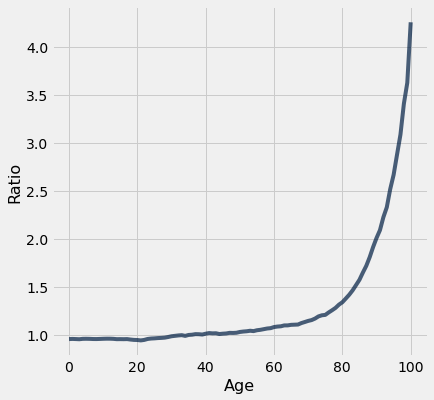

In [58]:
# There are more women then men bc women in general live longer 
# We can see that by using the following plot
ratioo=Table().with_column('Age',np.arange(0,101)).with_column('Ratio',ratio).sort('Age',descending =True)
ratioo.plot('Age','Ratio')

## Visualization ##

In [34]:
no_999 = simple.where('AGE', are.below(999))
everyone = no_999.where('SEX', 0).drop('SEX')

In [35]:
everyone

AGE,2010,2014
0,3944153,3948350
1,3978070,3962123
2,4096929,3957772
3,4119040,4005190
4,4063170,4003448
5,4056858,4004858
6,4066381,4134352
7,4030579,4154000
8,4046486,4119524
9,4148353,4106832


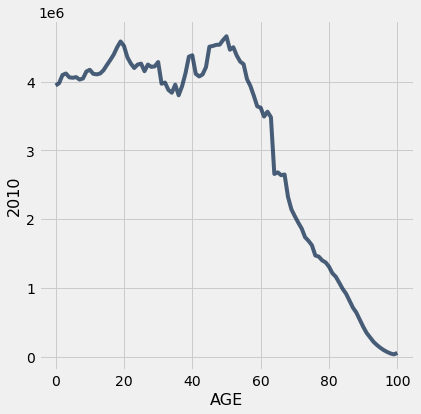

In [37]:
everyone.plot('AGE', '2010')
